In [1]:
# loading necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv(r"C:\Users\Swati Patle\Downloads\CWC23_all_innings.csv") 

Top Performing Teams:
  team       runs      wkts  runs_per_ball      econ
4  IND  38.572581  1.620690       0.920735  4.963793
7  PAK  37.390625  1.250000       0.933415  6.286923
6   NZ  37.333333  1.126984       1.000762  6.237143
8   SA  36.148936  1.629630       0.970307  5.682778
1  AUS  33.767742  1.241935       0.890978  5.661129


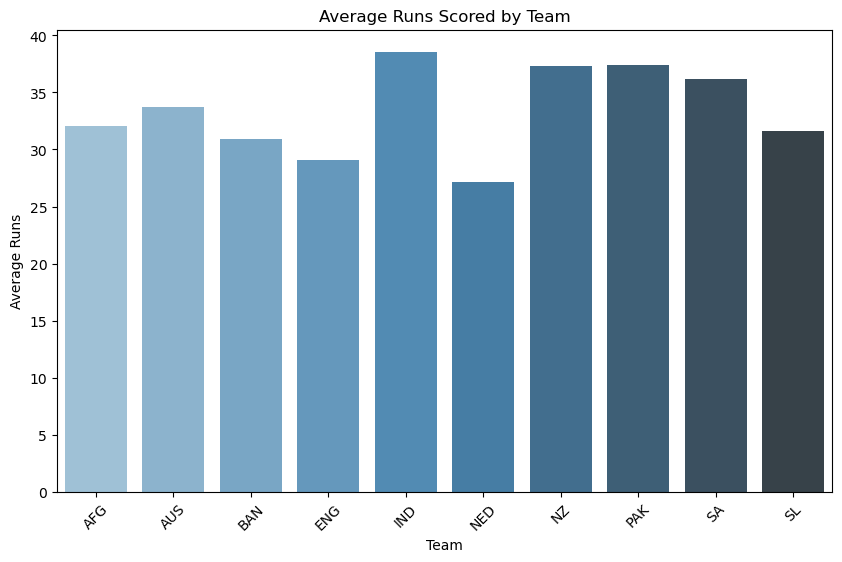

In [3]:
#1. Team Performance Analysis
team_performance = df.groupby('team').agg({
    'runs': 'mean',
    'wkts': 'mean',
    'runs_per_ball': 'mean',
    'econ': 'mean'
}).reset_index()

# Identify top-performing teams
top_teams = team_performance.nlargest(5, 'runs')  # Example: Top 5 teams by average runs scored
print("Top Performing Teams:")
print(top_teams)

# Visualize team performance
plt.figure(figsize=(10, 6))
sns.barplot(data=team_performance, x='team', y='runs', palette='Blues_d')
plt.title('Average Runs Scored by Team')
plt.xticks(rotation=45)
plt.xlabel('Team')
plt.ylabel('Average Runs')
plt.show()

In [4]:
# Aggregate team-wise performance metrics
team_totals = df.groupby('team').agg({
    'runs': 'sum',
    'wkts': 'sum',
    'bat_or_bowl': lambda x: x.value_counts().index[0]  # Most frequent value of bat_or_bowl indicates team's style
})

In [5]:
# Determine the number of matches played by each team
matches_played = df.groupby('team')['start_date'].nunique()
matches_played

team
AFG     9
AUS    10
BAN     9
ENG     9
IND    10
NED     9
NZ     10
PAK     9
SA     10
SL      9
Name: start_date, dtype: int64

In [6]:
# Analyze batting and bowling styles
# Calculate average runs scored per match and average wickets taken per match
team_totals['average_runs_per_match'] = team_totals['runs'] / matches_played
team_totals['average_wickets_per_match'] = team_totals['wkts'] / matches_played
team_totals

,runs,wkts,bat_or_bowl,average_runs_per_match,average_wickets_per_match
team,,,,,
AFG,4134,53.0,bat,459.333333,5.888889
AUS,5234,77.0,bat,523.400000,7.700000
BAN,4358,51.0,bat,484.222222,5.666667
ENG,4396,65.0,bat,488.444444,7.222222
IND,4783,94.0,bat,478.300000,9.400000
NED,4268,63.0,bat,474.222222,7.000000
NZ,5376,71.0,bat,537.600000,7.100000
PAK,4786,65.0,bat,531.777778,7.222222
SA,5097,88.0,bat,509.700000,8.800000


In [7]:
# Calculate percentage of runs scored through boundaries
df['boundary_runs'] = df['4s'] * 4 + df['6s'] * 6
df['total_runs'] = df['runs'] + df['boundary_runs']
total_runs_per_team = df.groupby('team')['total_runs'].sum()
boundary_runs_per_team = df.groupby('team')['boundary_runs'].sum()
team_totals['boundary_percentage'] = (boundary_runs_per_team / total_runs_per_team) * 100
print( total_runs_per_team)
print( boundary_runs_per_team)
print(team_totals)

team
AFG    2954.0
AUS    4334.0
BAN    2954.0
ENG    3305.0
IND    4404.0
NED    2578.0
NZ     4264.0
PAK    3460.0
SA     4339.0
SL     3016.0
Name: total_runs, dtype: float64
team
AFG     964.0
AUS    1612.0
BAN    1010.0
ENG    1170.0
IND    1594.0
NED     850.0
NZ     1552.0
PAK    1240.0
SA     1566.0
SL     1074.0
Name: boundary_runs, dtype: float64
      runs  wkts bat_or_bowl  average_runs_per_match  \
team                                                   
AFG   4134  53.0         bat              459.333333   
AUS   5234  77.0         bat              523.400000   
BAN   4358  51.0         bat              484.222222   
ENG   4396  65.0         bat              488.444444   
IND   4783  94.0         bat              478.300000   
NED   4268  63.0         bat              474.222222   
NZ    5376  71.0         bat              537.600000   
PAK   4786  65.0         bat              531.777778   
SA    5097  88.0         bat              509.700000   
SL    4366  50.0         

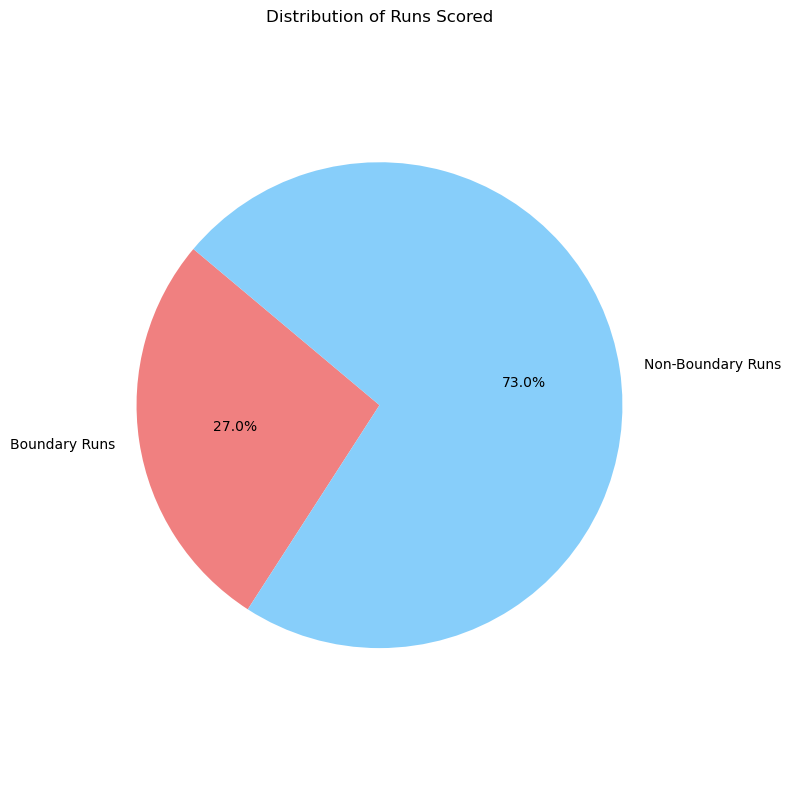

In [8]:
# Create pie chart for distribution of runs scored through different modes
boundary_runs = df['4s'].sum() * 4 + df['6s'].sum() * 6
non_boundary_runs = df['runs'].sum() - boundary_runs
labels = ['Boundary Runs', 'Non-Boundary Runs']
sizes = [boundary_runs, non_boundary_runs]
colors = ['lightcoral', 'lightskyblue']
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Runs Scored')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [9]:
# Compute batting and bowling averages, strike rates, economy rates, etc.
batting_stats = df[df['bat_or_bowl'] == 'bat'].groupby('team').agg({
    'runs': 'sum',
    'wkts': 'count',
    'bb_bf': 'sum'
})
bowling_stats = df[df['bat_or_bowl'] == 'bowl'].groupby('team').agg({
    'runs': 'sum',
    'wkts': 'sum',
    'overs': 'sum'
})
# Batting average = total runs / total wickets lost
batting_stats['batting_average'] = batting_stats['runs'] / batting_stats['wkts']
print(batting_stats)

# Batting strike rate = (total runs scored / total balls faced) * 100
batting_stats['strike_rate'] = (batting_stats['runs'] / batting_stats['bb_bf']) * 100
print(batting_stats)

# Bowling average = total runs conceded / total wickets taken
bowling_stats['bowling_average'] = bowling_stats['runs'] / bowling_stats['wkts']
print(bowling_stats)

# Bowling economy rate = (total runs conceded / total overs bowled)
bowling_stats['economy_rate'] = bowling_stats['runs'] / bowling_stats['overs']
print(bowling_stats)

      runs  wkts  bb_bf  batting_average
team                                    
AFG   1990     0   2392              inf
AUS   2722     0   2787              inf
BAN   1944     0   2459              inf
ENG   2135     0   2277              inf
IND   2810     0   2685              inf
NED   1728     0   2300              inf
NZ    2712     0   2616              inf
PAK   2220     0   2309              inf
SA    2773     0   2787              inf
SL    1942     0   2257              inf
      runs  wkts  bb_bf  batting_average  strike_rate
team                                                 
AFG   1990     0   2392              inf    83.193980
AUS   2722     0   2787              inf    97.667743
BAN   1944     0   2459              inf    79.056527
ENG   2135     0   2277              inf    93.763724
IND   2810     0   2685              inf   104.655493
NED   1728     0   2300              inf    75.130435
NZ    2712     0   2616              inf   103.669725
PAK   2220     0   230

In [10]:
# Identify top-performing teams and their strengths
# Top-performing teams based on total runs and wickets
top_teams_by_runs = team_totals.sort_values(by='runs', ascending=False).head(3)
top_teams_by_wkts = team_totals.sort_values(by='wkts', ascending=False).head(3)

# Print top-performing teams and their strengths
print("Top 3 teams by total runs:")
print(top_teams_by_runs)

print("\nTop 3 teams by total wickets:")
print(top_teams_by_wkts)

Top 3 teams by total runs:
      runs  wkts bat_or_bowl  average_runs_per_match  \
team                                                   
NZ    5376  71.0         bat                   537.6   
AUS   5234  77.0         bat                   523.4   
SA    5097  88.0         bat                   509.7   

      average_wickets_per_match  boundary_percentage  
team                                                  
NZ                          7.1            36.397749  
AUS                         7.7            37.194278  
SA                          8.8            36.091265  

Top 3 teams by total wickets:
      runs  wkts bat_or_bowl  average_runs_per_match  \
team                                                   
IND   4783  94.0         bat                   478.3   
SA    5097  88.0         bat                   509.7   
AUS   5234  77.0         bat                   523.4   

      average_wickets_per_match  boundary_percentage  
team                                              

In [9]:
# Merge batting and bowling stats with team_totals
team_performance = pd.merge(team_totals, batting_stats[['batting_average', 'strike_rate']], on='team')
team_performance = pd.merge(team_performance, bowling_stats[['bowling_average', 'economy_rate']], on='team')

# Display team-wise performance metrics
print(team_performance)

      runs  wkts bat_or_bowl  batting_average  strike_rate  bowling_average  \
team                                                                          
AFG   4134  53.0         bat              inf    83.193980        40.452830   
AUS   5234  77.0         bat              inf    97.667743        32.623377   
BAN   4358  51.0         bat              inf    79.056527        47.333333   
ENG   4396  65.0         bat              inf    93.763724        34.784615   
IND   4783  94.0         bat              inf   104.655493        20.989362   
NED   4268  63.0         bat              inf    75.130435        40.317460   
NZ    5376  71.0         bat              inf   103.669725        37.521127   
PAK   4786  65.0         bat              inf    96.145518        39.476923   
SA    5097  88.0         bat              inf    99.497668        26.409091   
SL    4366  50.0         bat              inf    86.043420        48.480000   

      economy_rate  
team                
AFG      

In [10]:
# Visualize the data 
# Visualize batting styles
plt.bar(team_totals.index, team_totals['boundary_percentage'])
plt.xlabel('Team')
plt.ylabel('Percentage of runs scored through boundaries')
plt.title('Batting styles of teams')
plt.xticks(rotation=45)
plt.show()

KeyError: 'boundary_percentage'

In [ ]:
# Create heatmap for batting and bowling styles
batting_style = df[df['bat_or_bowl'] == 'bat'].groupby('team').agg({'4s': 'sum', '6s': 'sum'}).reset_index()
bowling_style = df[df['bat_or_bowl'] == 'bowl'].groupby('team').agg({'wkts': 'sum'}).reset_index()
batting_style['Boundary Runs'] = batting_style['4s'] * 4 + batting_style['6s'] * 6
batting_style.drop(['4s', '6s'], axis=1, inplace=True)
batting_style.set_index('team', inplace=True)
bowling_style.set_index('team', inplace=True)
batting_style_normalized = (batting_style - batting_style.min()) / (batting_style.max() - batting_style.min())
bowling_style_normalized = (bowling_style - bowling_style.min()) / (bowling_style.max() - bowling_style.min())

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(batting_style_normalized, annot=True, cmap='YlGnBu')
plt.title('Batting Style Heatmap')
plt.xlabel('Batting Style')
plt.ylabel('Team')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(bowling_style_normalized, annot=True, cmap='YlGnBu')
plt.title('Bowling Style Heatmap')
plt.xlabel('Bowling Style')
plt.ylabel('Team')
plt.show() 

In [ ]:
# 2. Player Performance Analysis
# Batting statistics
batting_stats = df[df['bat_or_bowl'] == 'bat'].groupby('player').agg({
    'runs': 'sum',
    'bb_bf': 'sum',
    '4s': 'sum',
    '6s': 'sum',
    'wkts': 'sum',
    'not_out': 'sum'
})
batting_stats['average'] = batting_stats['runs'] / (batting_stats['wkts'] - batting_stats['not_out'])
batting_stats['strike_rate'] = (batting_stats['runs'] / batting_stats['bb_bf']) * 100

# Bowling statistics
bowling_stats = df[df['bat_or_bowl'] == 'bowl'].groupby('player').agg({
    'wkts': 'sum',
    'runs': 'sum',
    'overs': 'sum'
})
bowling_stats['bowling_average'] = bowling_stats['runs'] / bowling_stats['wkts']
bowling_stats['economy_rate'] = (bowling_stats['runs'] / bowling_stats['overs'])

# Merge batting and bowling stats
player_performance = pd.merge(batting_stats, bowling_stats, on='player')



In [ ]:
# Identify leading run-scorers and wicket-takers
leading_run_scorers = player_performance.nlargest(10, 'runs_y')
leading_wicket_takers = player_performance.nlargest(10, 'wkts_y')

# Display player performance metrics
print("Leading Run Scorers:")
print(leading_run_scorers[['runs_y', 'average', 'strike_rate']])

print("\nLeading Wicket Takers:")
print(leading_wicket_takers[['wkts_y', 'bowling_average', 'economy_rate']])

In [11]:
# Assess player impact on team's performance
team_totals = df.groupby('player')['runs'].sum()
player_performance['contribution_percentage'] = (player_performance['runs_y'] / team_totals) * 100

print("\nPlayer Impact on Team's Performance:")
print(player_performance[['runs_y', 'wkts_y', 'contribution_percentage']])

NameError: name 'player_performance' is not defined

In [12]:
# 3. Opposition and Ground Analysis
# 1. Investigate How Teams and Players Perform Against Different Oppositions
opposition_performance_teams = df.groupby('opposition').agg({
    'runs': 'sum',
    'wkts': 'sum'
}).rename(columns={'bat_or_bowl': 'matches_played'})

opposition_performance_players = df.groupby(['opposition', 'player']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).rename(columns={'bat_or_bowl': 'matches_played'})



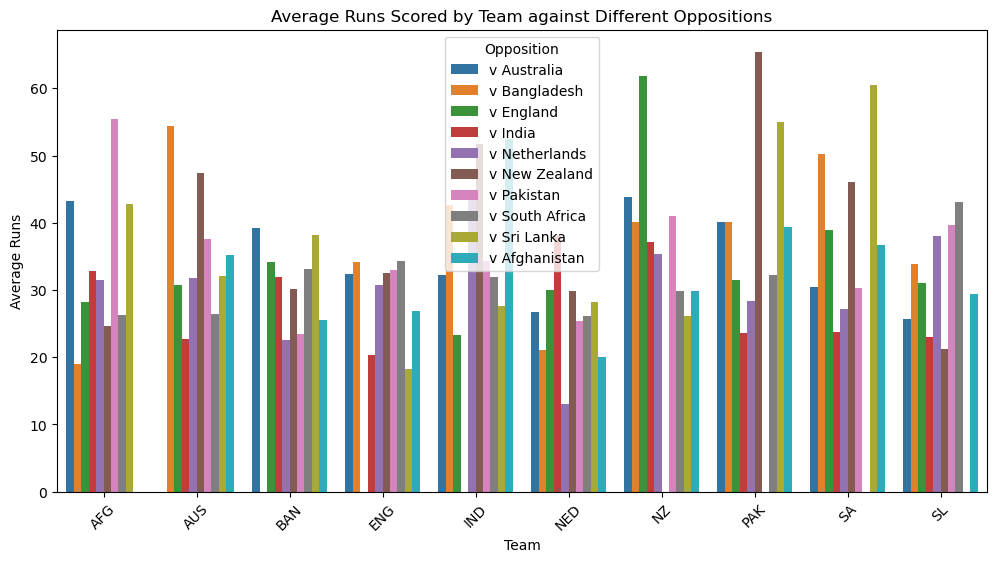

In [13]:
opposition_performance = df.groupby(['team', 'opposition']).agg({
    'runs': 'mean',
    'wkts': 'mean'
}).reset_index()

# Visualize performance against different oppositions
plt.figure(figsize=(12, 6))
sns.barplot(data=opposition_performance, x='team', y='runs', hue='opposition')
plt.title('Average Runs Scored by Team against Different Oppositions')
plt.xticks(rotation=45)
plt.xlabel('Team')
plt.ylabel('Average Runs')
plt.legend(title='Opposition')
plt.show()

<Figure size 1200x600 with 0 Axes>

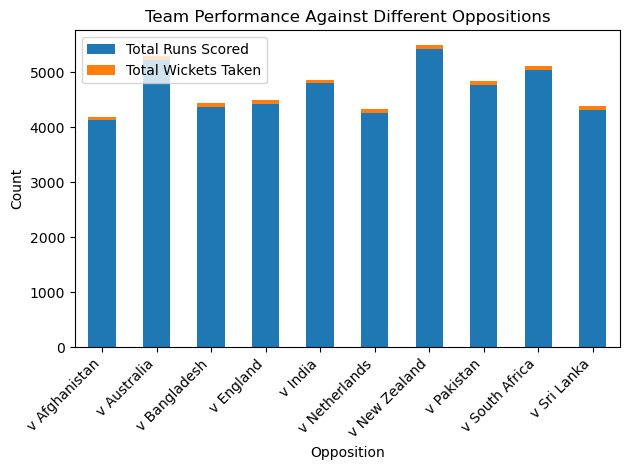

In [14]:
# Visualize Team Performance Against Different Oppositions (Bar Plot)
plt.figure(figsize=(12, 6))
opposition_performance_teams.plot(kind='bar', stacked=True)
plt.title('Team Performance Against Different Oppositions')
plt.xlabel('Opposition')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(['Total Runs Scored', 'Total Wickets Taken'])
plt.tight_layout()
plt.show()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team             1408 non-null   object 
 1   player           1408 non-null   object 
 2   bat_or_bowl      1408 non-null   object 
 3   bb_bf            1408 non-null   int64  
 4   runs             1408 non-null   int64  
 5   wkts             562 non-null    float64
 6   wicketball_prob  1408 non-null   float64
 7   runs_per_ball    1408 non-null   float64
 8   opposition       1408 non-null   object 
 9   ground           1408 non-null   object 
 10  start_date       1408 non-null   object 
 11  overs            562 non-null    float64
 12  mdns             562 non-null    float64
 13  econ             562 non-null    float64
 14  inns             1408 non-null   int64  
 15  4s               846 non-null    float64
 16  6s               846 non-null    float64
 17  sr            

In [16]:
# Select the top 5 players based on a specific metric (e.g., Total Runs Scored)
top_5_players = opposition_performance_players.nlargest(5, 'runs')

<Figure size 1000x700 with 0 Axes>

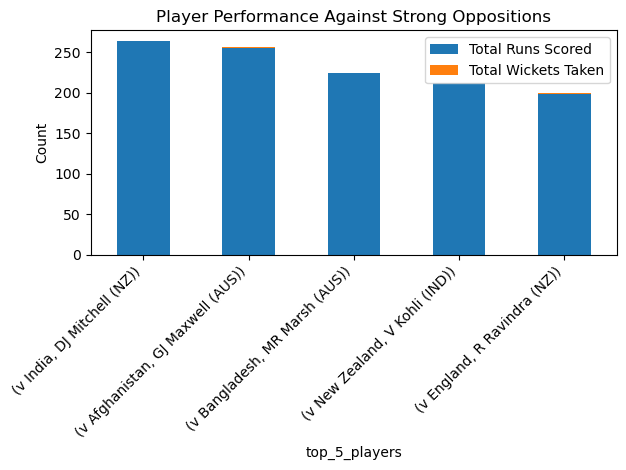

In [17]:
# Visualize Player Performance Against Strong Oppositions (Bar Plot)
plt.figure(figsize=(10,7))
top_5_players.plot(kind='bar', stacked=True)
plt.title('Player Performance Against Strong Oppositions')
plt.xlabel('top_5_players')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(['Total Runs Scored', 'Total Wickets Taken'])
plt.tight_layout()
plt.show()

In [18]:
# Examine Performance Variations Across Different Playing Grounds
ground_performance_teams = df.groupby('ground').agg({
    'runs': 'sum',
    'wkts': 'sum'
}).rename(columns={'bat_or_bowl': 'matches_played'})

ground_performance_players = df.groupby(['ground', 'player']).agg({
    'runs': 'sum',
    'wkts': 'sum'
}).rename(columns={'bat_or_bowl': 'matches_played'})



<Figure size 1200x600 with 0 Axes>

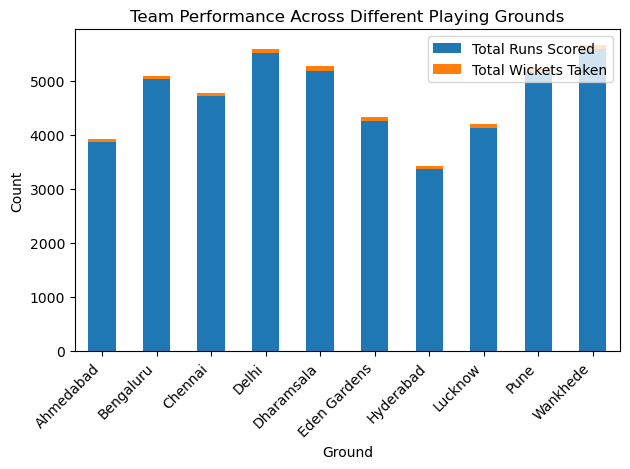

In [19]:
plt.figure(figsize=(12, 6))
ground_performance_teams.plot(kind='bar', stacked=True)
plt.title('Team Performance Across Different Playing Grounds')
plt.xlabel('Ground')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(['Total Runs Scored', 'Total Wickets Taken'])
plt.tight_layout()
plt.show()

In [20]:
# Select the top 5 players based on a specific metric (e.g., Total Runs Scored)
top_5_players = ground_performance_players.nlargest(5, 'runs')

<Figure size 100000x150000 with 0 Axes>

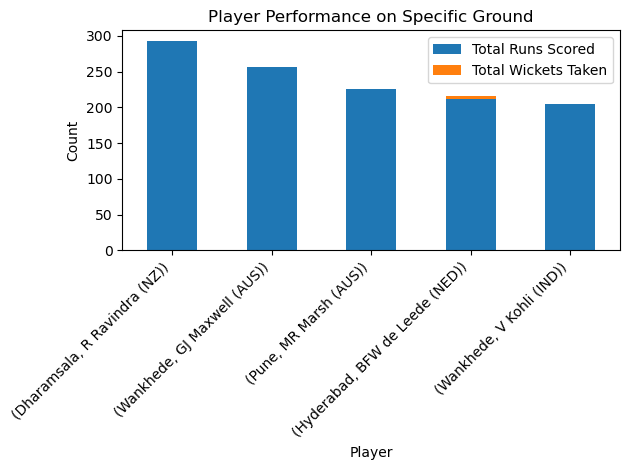

In [21]:
plt.figure(figsize=(1000, 1500))  # Increase width to 20 inches and height to 15 inches
top_5_players.plot(kind='bar', stacked=True)
plt.title('Player Performance on Specific Ground')
plt.xlabel('Player')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(['Total Runs Scored', 'Total Wickets Taken'])
plt.tight_layout()
plt.show()

In [22]:
# Identify Specific Teams or Players Excelling in Certain Conditions
# Example: Analyze performance against strong oppositions or on specific grounds
strong_opposition_performance_teams = opposition_performance_teams[opposition_performance_teams.index == 'Strong Opposition']
strong_opposition_performance_players = opposition_performance_players[opposition_performance_players.index.get_level_values('opposition') == 'Strong Opposition']

specific_ground_performance_teams = ground_performance_teams[ground_performance_teams.index == 'Specific Ground']
specific_ground_performance_players = ground_performance_players[ground_performance_players.index.get_level_values('ground') == 'Specific Ground']

In [23]:
# 4. Temporal Analysis
# Convert 'start_date' column to datetime format
df['start_date'] = pd.to_datetime(df['start_date'])

# Group data by start date and calculate aggregate performance metrics
temporal_performance = df.groupby('start_date').agg({
    'runs': 'sum',
    'wkts': 'sum',
    'overs': 'sum'
}).reset_index()

C:\Users\Swati Patle\AppData\Local\Temp\ipykernel_4696\328556087.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_date'] = pd.to_datetime(df['start_date'])


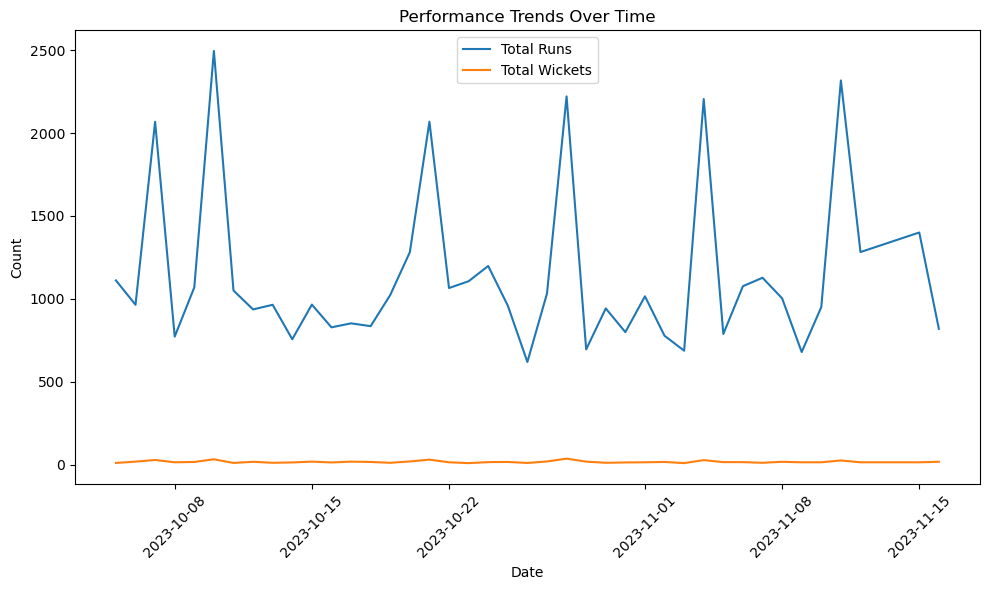

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(temporal_performance['start_date'], temporal_performance['runs'], label='Total Runs')
plt.plot(temporal_performance['start_date'], temporal_performance['wkts'], label='Total Wickets')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Performance Trends Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


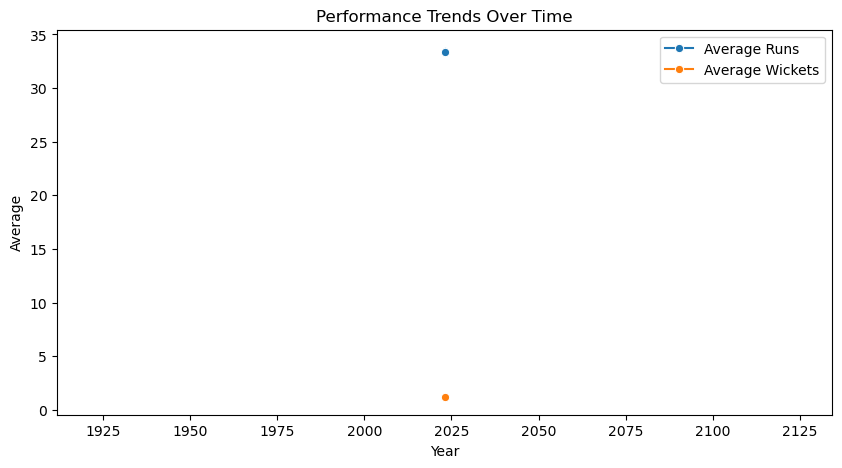

In [25]:
# Extract year and month from start_date
df['year'] = df['start_date'].dt.year
df['month'] = df['start_date'].dt.month

# Performance trends over time
performance_over_time = df.groupby(['year', 'month']).agg({
    'runs': 'mean',
    'wkts': 'mean'
}).reset_index()

# Visualize performance trends over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=performance_over_time, x='year', y='runs', marker='o', label='Average Runs')
sns.lineplot(data=performance_over_time, x='year', y='wkts', marker='o', label='Average Wickets')
plt.title('Performance Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average')
plt.legend()
plt.show()

In [26]:
# using label encoder for encoding all categorical variables
from sklearn.preprocessing import LabelEncoder
# Converting all object columns
for col in df.select_dtypes(include=['object']).columns:
    # Example of using Label Encoding for demonstration
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [27]:
# churn correlation matrix
corr= df.corr()
corr.style.background_gradient(cmap='viridis')

C:\Users\Swati Patle\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\Swati Patle\anaconda3\Lib\site-packages\pandas\io\formats\style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,team,player,bat_or_bowl,bb_bf,runs,wkts,wicketball_prob,runs_per_ball,opposition,ground,start_date,overs,mdns,econ,inns,4s,6s,sr,not_out,mins,year,month
team,1.000000,-0.148877,-0.001541,0.002089,0.035616,0.038567,0.006876,0.033721,-0.139454,0.031323,0.016319,0.015263,0.012147,0.086142,0.020949,0.023183,0.031030,0.011849,-0.025769,0.000060,nan,0.028081
player,-0.148877,1.000000,-0.019285,0.032981,0.010918,-0.044151,-0.012624,-0.051533,0.013263,0.014902,-0.005463,0.091867,-0.000476,-0.028940,-0.011092,0.006702,-0.066608,-0.058325,0.029724,0.022449,nan,-0.012811
bat_or_bowl,-0.001541,-0.019285,1.000000,0.287261,0.265925,nan,-0.237815,0.160471,-0.012461,-0.009169,-0.008078,nan,nan,nan,0.018493,nan,nan,nan,nan,nan,nan,-0.001206
bb_bf,0.002089,0.032981,0.287261,1.000000,0.887394,0.447171,-0.390348,0.126681,-0.024495,0.008006,0.004549,0.999640,0.177911,-0.250849,-0.060855,0.817177,0.548659,0.171597,0.021591,0.977709,nan,0.003527
runs,0.035616,0.010918,0.265925,0.887394,1.000000,0.204501,-0.353732,0.415005,0.008209,0.010559,0.004187,0.680757,-0.146306,0.454501,-0.086513,0.897459,0.743491,0.373354,0.070792,0.914893,nan,0.014492
wkts,0.038567,-0.044151,nan,0.447171,0.204501,1.000000,0.801633,-0.239768,0.014345,0.005316,-0.000335,0.444395,0.233345,-0.239856,-0.042993,nan,nan,nan,nan,nan,nan,-0.021613
wicketball_prob,0.006876,-0.012624,-0.237815,-0.390348,-0.353732,0.801633,1.000000,-0.356131,-0.016482,0.022085,0.019700,0.106716,0.162069,-0.167113,0.034869,-0.324047,-0.204617,-0.370576,-0.222983,-0.385005,nan,0.024984
runs_per_ball,0.033721,-0.051533,0.160471,0.126681,0.415005,-0.239768,-0.356131,1.000000,0.078354,-0.007133,0.005055,-0.251665,-0.359422,0.999999,-0.079171,0.356368,0.436713,1.000000,0.257486,0.185548,nan,0.023978
opposition,-0.139454,0.013263,-0.012461,-0.024495,0.008209,0.014345,-0.016482,0.078354,1.000000,-0.007232,-0.037743,-0.011820,-0.011015,0.025877,0.009956,0.030169,0.018725,0.109179,0.018940,-0.007366,nan,-0.023861
ground,0.031323,0.014902,-0.009169,0.008006,0.010559,0.005316,0.022085,-0.007133,-0.007232,1.000000,0.136840,0.046461,0.009853,-0.022565,0.025685,-0.019441,0.009885,0.001830,-0.015426,0.002526,nan,0.090480
